In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, datasets
import matplotlib.pyplot as plt

2024-04-23 20:52:35.257265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 20:52:36.114796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 55s 0us/step


2024-04-23 20:53:37.685961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 20:53:37.687006: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10


2024-04-23 20:53:39.669174: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4603 - loss: 1.5053

2024-04-23 20:56:15.891966: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 100ms/step - accuracy: 0.4604 - loss: 1.5051 - val_accuracy: 0.6021 - val_loss: 1.1092
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.6901 - loss: 0.8832 - val_accuracy: 0.6211 - val_loss: 1.0828
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.7628 - loss: 0.6719 - val_accuracy: 0.6793 - val_loss: 0.9788
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.8132 - loss: 0.5373 - val_accuracy: 0.7394 - val_loss: 0.7827
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.8600 - loss: 0.4085 - val_accuracy: 0.7741 - val_loss: 0.6904
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.8924 - loss: 0.3060 - val_accuracy: 0.7211 - val_loss: 0.9225
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.9188 - loss: 0.2313 - val_accuracy: 0.6552 - val_loss: 1.2910
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 85ms/step - accuracy: 0.9437 

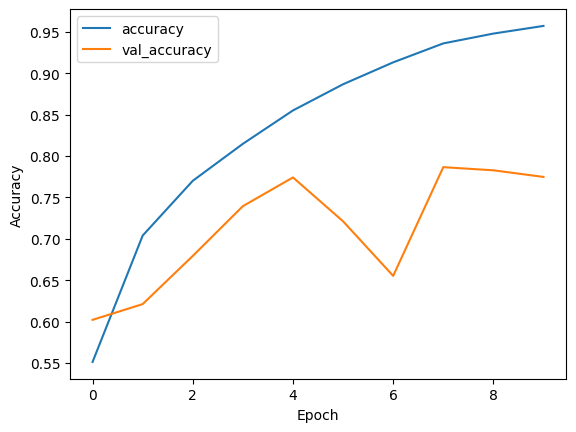

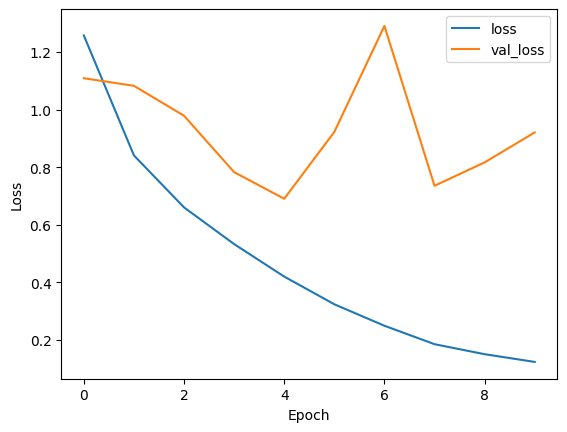

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def residual_block(x, filters, downsample=False):
    y = layers.Conv2D(filters, kernel_size=3, strides=(1 if not downsample else 2), padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.ReLU()(y)
    y = layers.Conv2D(filters, kernel_size=3, padding='same')(y)
    y = layers.BatchNormalization()(y)
    if downsample:
        x = layers.Conv2D(filters, kernel_size=1, strides=2, padding='same')(x)
    return layers.ReLU()(x + y)

def ResNet():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, kernel_size=3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Stack residual blocks
    num_blocks_list = [2, 2, 2, 2]  # Number of blocks in each stack
    for stack in range(4):
        for block in range(num_blocks_list[stack]):
            x = residual_block(x, filters=64 if stack == 0 else 128, downsample=(block
                                                             == 0 and stack > 0))

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)


model = ResNet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted labels for the three samples:
Sample 1: Predicted class frog
Sample 2: Predicted class automobile
Sample 3: Predicted class automobile


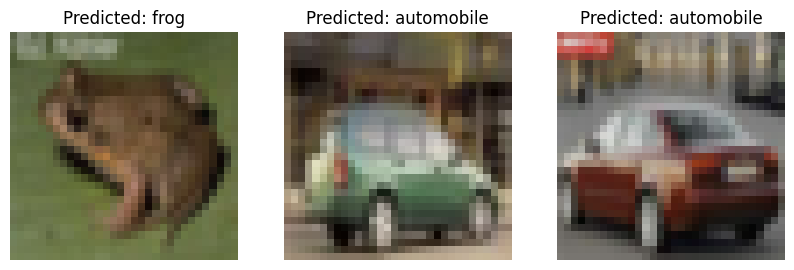

In [6]:

# Get three samples from the test dataset
num_samples = 3
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]

# Perform inference
predictions = model.predict(sample_images)

# Decode predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print predicted labels
print('Predicted labels for the three samples:')
for i in range(num_samples):
    predicted_class = class_names[predicted_labels[i]]
    print('Sample %d: Predicted class %s' % (i+1, predicted_class))
    
# Plot the images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title('Predicted: %s' % class_names[predicted_labels[i]])
    plt.axis('off')
plt.show()